<a href="https://colab.research.google.com/github/philipp-lampert/mymandible/blob/main/data_science/02_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the data exploration and visualization notebook

In [216]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's first import the processed dataframe from GitHub.

In [217]:
df = pd.read_parquet('https://github.com/philipp-lampert/mymandible/blob/main/data_science/data/processed_data.parquet?raw=true')

We will start by creating some graphs to get a sense of what our patient collective looks like.

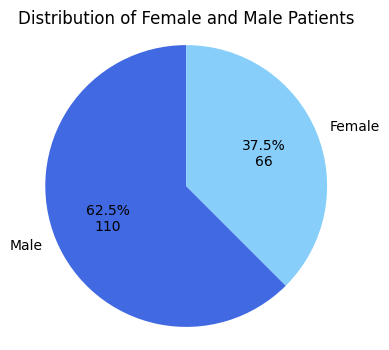

In [218]:
female_count = df['sex_female'].sum()
male_count = len(df) - female_count

labels = ['Male', 'Female']
sizes = [male_count, female_count, ]
colors = ['royalblue', 'lightskyblue']

# Calculate total count
total_count = sum(sizes)

# Create a pie chart with both percentage and absolute number
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: f'{p:.1f}%\n{int(total_count * p / 100)}', startangle=90)
plt.title('Distribution of Female and Male Patients')
plt.axis('equal')
plt.show()

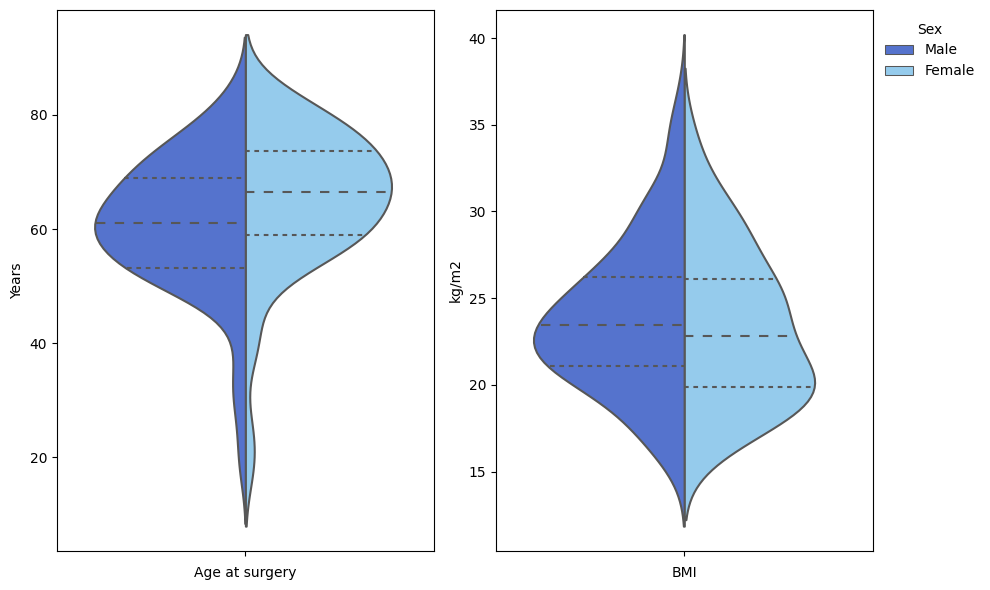

In [219]:
df['all'] = ''

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

bw = 0.4

sns.violinplot(x=df['all'], y=df['age_surgery_years'].astype('int'), palette=colors, hue=df['sex_female'], split = True, bw=bw, inner='quart')
plt.legend([], frameon=False)

plt.xlabel('Age at surgery')
plt.ylabel('Years')
plt.title('')

plt.subplot(1, 2, 2)
ax = sns.violinplot(x=df['all'], y=df['bmi'].astype('float'), hue=df['sex_female'], palette=colors, split=True, bw=bw, inner='quart')

handles, labels = ax.get_legend_handles_labels()
labels = ["Male", "Female"]
ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(1, 1), title = 'Sex', frameon=False)

plt.xlabel('BMI')
plt.ylabel('kg/m2')
plt.title('')

plt.tight_layout()
plt.show()

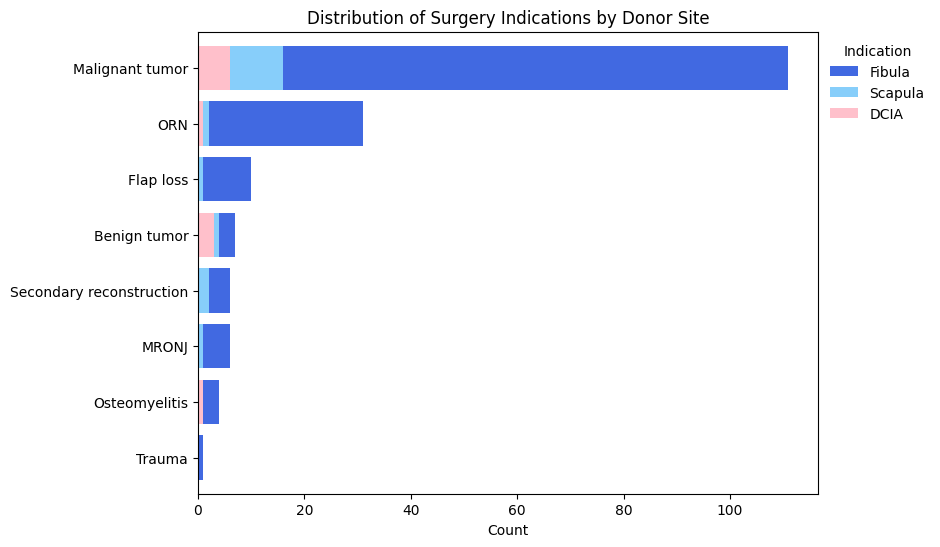

In [220]:
# Count the occurrences of 'indication' for each 'flap_donor_site'
indication_counts_by_site = df.groupby('indication')['flap_donor_site'].value_counts().unstack()

# Calculate the total counts for each 'indication'
indication_counts_by_site['total'] = indication_counts_by_site.sum(axis=1)

# Sort the 'indication_counts_by_site' DataFrame by 'total' in ascending order
indication_counts_by_site = indication_counts_by_site.sort_values(by='total', ascending=True).drop('total', axis=1)

# Define a custom order for 'flap_donor_site' columns
flap_donor_site_order = ['pelvis', 'scapula', 'fibula']

# Use the 'reorder_levels' function to reorder the 'flap_donor_site' columns
indication_counts_by_site = indication_counts_by_site[flap_donor_site_order]

# Define a dictionary to rename the 'indication' values
labels = {
    'malignant_tumor': 'Malignant tumor',
    'benign_tumor': 'Benign tumor',
    'osteoradionecrosis': 'ORN',
    'secondary_reconstruction': 'Secondary reconstruction',
    'flap_loss': 'Flap loss',
    'medication_related_osteonecrosis': 'MRONJ',
    'osteomyelitis': 'Osteomyelitis',
    'trauma': 'Trauma'
}

colors = ['pink', 'lightskyblue', 'royalblue']

# Use the 'replace' function to rename the 'indication' values
indication_counts_by_site.index = indication_counts_by_site.index.to_series().replace(labels)

# Create a stacked bar chart
ax = indication_counts_by_site.plot(kind='barh', stacked=True, figsize=(8, 6), color=colors, width=0.8)

# Set labels and title
plt.xlabel('Count')
plt.ylabel('')
plt.title('Distribution of Surgery Indications by Donor Site')

# Customize the legend order
legend_order = {
    "pelvis": 0,
    "scapula": 1,
    "fibula": 2,
}

handles, labels = ax.get_legend_handles_labels()
labels = ["DCIA", "Scapula", "Fibula"]
order = [2, 1, 0]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="upper left", bbox_to_anchor=(1, 1), title = 'Indication', frameon=False)

plt.show()


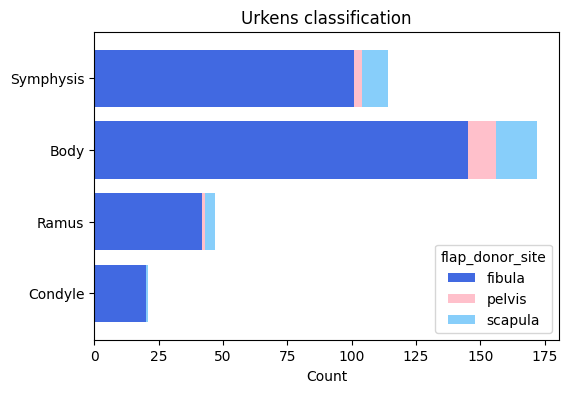

In [221]:
classification_columns = [col for col in df.columns if col.startswith("urkens_classification___")]
classification_counts_by_site = df.groupby('flap_donor_site')[classification_columns].sum()

classification_counts_by_site = classification_counts_by_site[classification_counts_by_site.sum().index].T

labels = {
    'urkens_classification___c': 'Condyle',
    'urkens_classification___r': 'Ramus',
    'urkens_classification___b': 'Body',
    'urkens_classification___s': 'Symphysis'
}

# Use the 'replace' function to rename the 'indication' values
classification_counts_by_site.index = classification_counts_by_site.index.to_series().replace(labels)

# Create a stacked bar chart
ax = classification_counts_by_site.plot(kind='barh', stacked=True, figsize=(6, 4), color=['royalblue', 'pink', 'lightskyblue'], width=0.8)

# Create a bar chart
plt.title('Urkens classification')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

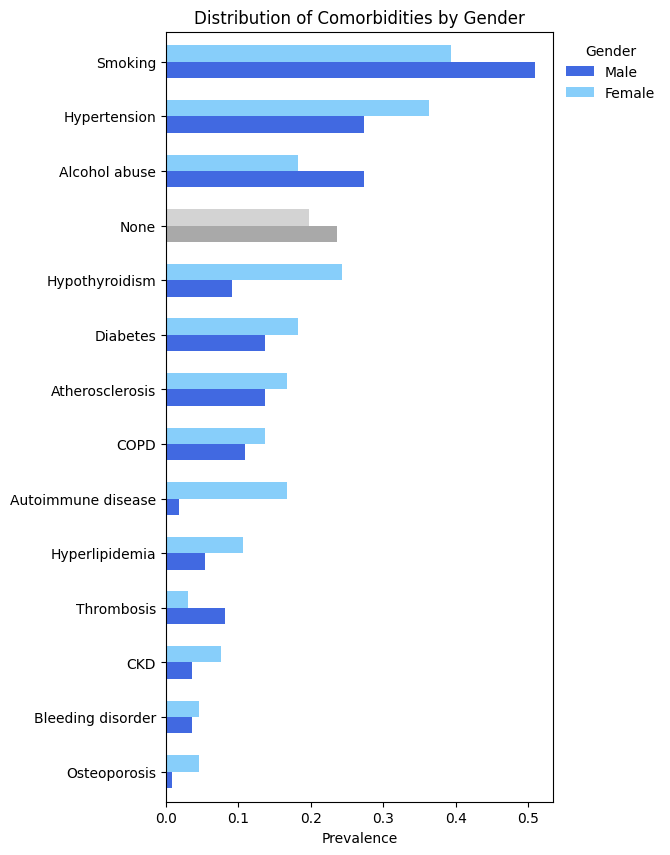

In [222]:
comorbidity_columns = [col for col in df.columns if col.startswith("comorbidity___")]
comorbidity_counts_by_gender = df.groupby('sex_female')[comorbidity_columns].mean()

comorbidity_counts_by_gender = comorbidity_counts_by_gender[comorbidity_counts_by_gender.sum().sort_values(ascending=True).index].T

comorbidity_labels = {
    'comorbidity___smoking': 'Smoking',
    'comorbidity___hypertension': 'Hypertension',
    'comorbidity___none': 'None',
    'comorbidity___alcohol': 'Alcohol abuse',
    'comorbidity___diabetes': 'Diabetes',
    'comorbidity___hypothyroidism': 'Hypothyroidism',
    'comorbidity___copd': 'COPD',
    'comorbidity___atherosclerosis': 'Atherosclerosis',
    'comorbidity___hyperlipidemia': 'Hyperlipidemia',
    'comorbidity___autoimmune_disease': 'Autoimmune disease',
    'comorbidity___osteoporosis': 'Osteoporosis',
    'comorbidity___thrombosis': 'Thrombosis',
    'comorbidity___chronic_kidney_disease': 'CKD',
    'comorbidity___bleeding_disorder': 'Bleeding disorder'
}

comorbidity_counts_by_gender = comorbidity_counts_by_gender.rename(columns={True: 'Female', False: 'Male'})
comorbidity_counts_by_gender.index = comorbidity_counts_by_gender.index.map(comorbidity_labels)

def setcolors(ax, name="None", colors=['darkgrey', 'lightgrey']):
    # get labels
    ytl = ax.get_yticklabels()
    numlabels = len(ytl)

    # find the index of the given named label
    for i, t in enumerate(ytl):
        if t.get_text() == name:
            break

    # get the matplotlib rectangle objects representing the bars
    # (note this relies on nothing else having been added to the plot)
    rects = ax.get_children()[0:2 * numlabels]
    nrects = [rects[i], rects[numlabels + i]]

    # loop over the two bars for the given named label and change the colours
    for rect, color in zip(nrects, colors):
        rect.set_color(color)
        rect.set_edgecolor("none")

bars = comorbidity_counts_by_gender.plot(kind='barh', stacked=False, figsize=(5, 10), color=["royalblue", "lightskyblue"], width=0.6)

plt.title('Distribution of Comorbidities by Gender')
plt.xlabel('Prevalence')
plt.ylabel('')
bars.legend(title='Gender', loc="upper left", bbox_to_anchor=(1, 1), frameon=False)

setcolors(bars)

plt.show()

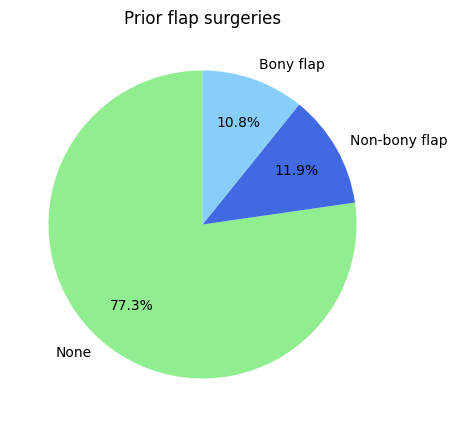

In [223]:
flap_counts = df['prior_flap'].value_counts()

sizes = flap_counts.values
colors = ['lightgreen', 'royalblue', 'lightskyblue']

labels = {
    'none': 'None',
    'bony': 'Bony flap',
    'non_bony': 'Non-bony flap',
}

flap_counts = flap_counts.rename(labels)
labels = flap_counts.index

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.7)
plt.title('Prior flap surgeries')
plt.show()

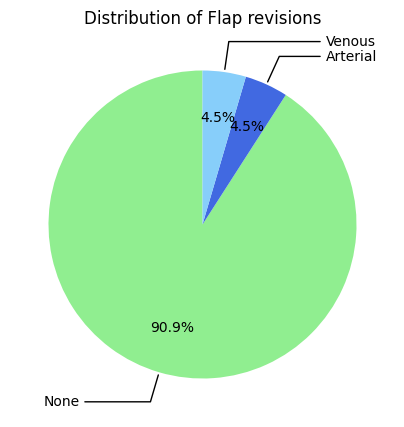

In [224]:
import numpy as np
import matplotlib.pyplot as plt

value_counts = df['flap_revision'].value_counts()
labels = {
    'none': 'None',
    'arterial': 'Arterial',
    'venous': 'Venous',
}
value_counts = value_counts.rename(labels)
labels = value_counts.index

plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(value_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.7, colors=colors)

kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    xtext = 0.8 * np.sign(x)
    ytext = 1.2 * y
    plt.annotate(labels[i], (x, y), xytext=(xtext, ytext), horizontalalignment=horizontalalignment, **kw)

plt.title('Distribution of Flap revisions')
plt.show()


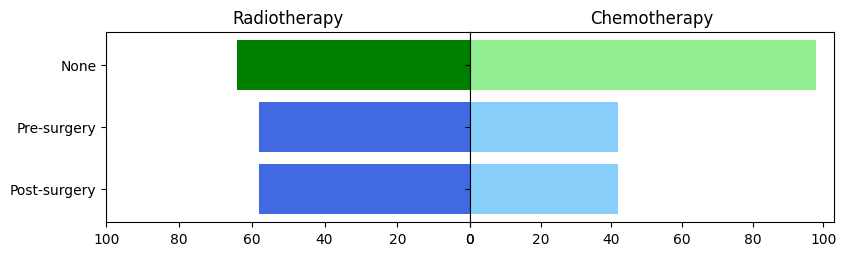

In [225]:
# Calculate counts for radiotherapy columns
radiotherapy = {}

for column in df.columns:
    if "radiotherapy___" in column:
        radiotherapy_option = column.replace('radiotherapy___', '')
        radiotherapy[radiotherapy_option] = df[column].sum()

chemotherapy = {}

for column in df.columns:
    if "chemotherapy___" in column:
        chemotherapy_option = column.replace('chemotherapy___', '')
        chemotherapy[chemotherapy_option] = df[column].sum()


data = {
    'radiotherapy': list(radiotherapy.values()),
    'chemotherapy': list(chemotherapy.values())
}

labels = {
    'none': 'None',
    'pre_surgery': 'Pre-surgery',
    'post_surgery': 'Post-surgery'
}

index = [labels[key] for key in radiotherapy.keys()]

data = pd.DataFrame(data, index=index)

fig, ax = plt.subplots(figsize=(8, 2.5), ncols=2, sharey=True)
fig.tight_layout()

# Plot the bidirectional bar plot for radiotherapy
ax[0].barh(index, data['radiotherapy'], color=['green', 'royalblue', 'royalblue'], align='center')
ax[0].set_title('Radiotherapy')

# Plot the bidirectional bar plot for chemotherapy
ax[1].barh(index, data['chemotherapy'], color=['lightgreen', 'lightskyblue', 'lightskyblue'], align='center')
ax[1].set_title('Chemotherapy')

ax[0].invert_xaxis()
ax[0].invert_yaxis()

ax[0].set(yticks=data.index, yticklabels=data.index)
ax[0].yaxis.tick_left()
ax[0].tick_params(axis='y')
ax[0].set_xticks([0, 20, 40, 60, 80, 100])
plt.subplots_adjust(wspace=0)

plt.show()

In [227]:
# Plot for plate type and plate thickness

In [228]:
# Plot for TMJ replacement type

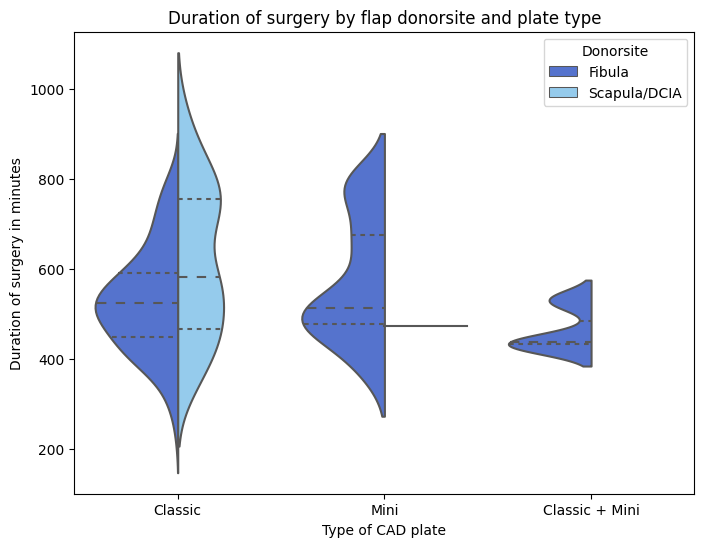

In [229]:
plt.figure(figsize=(8, 6))

colors = ['royalblue', 'lightskyblue']

labels = {
    'cad_long': 'Classic',
    'cad_mini': 'Mini',
    'cad_mix': 'Classic + Mini'
}

df['plate_type'] = df['plate_type'].map(labels)

bw = 0.4

df['no_fibula'] = np.where(df['flap_donor_site'] != 'fibula', True, False)

ax = sns.violinplot(x=df['plate_type'], y=df['surgery_duration_min'].astype('int'), hue=df['no_fibula'], split=True, palette=colors, bw=bw, inner='quart')

handles, labels = ax.get_legend_handles_labels()
labels = ["Fibula", "Scapula/DCIA"]
ax.legend(handles, labels, title = 'Donorsite')

plt.xlabel('Type of CAD plate')
plt.ylabel('Duration of surgery in minutes')
plt.title('Duration of surgery by flap donorsite and plate type')

plt.show()

In [230]:
df.columns.values

array(['sex_female', 'indication', 'comorbidity___none',
       'comorbidity___smoking', 'comorbidity___alcohol',
       'comorbidity___copd', 'comorbidity___hypertension',
       'comorbidity___diabetes', 'comorbidity___atherosclerosis',
       'comorbidity___hyperlipidemia', 'comorbidity___osteoporosis',
       'comorbidity___hypothyroidism',
       'comorbidity___chronic_kidney_disease', 'comorbidity___thrombosis',
       'comorbidity___bleeding_disorder',
       'comorbidity___autoimmune_disease', 'which_autoimmune_disease',
       'which_bleeding_disorder', 'prior_flap', 'age_surgery_years',
       'flap_donor_site', 'flap_revision', 'days_to_flap_revision',
       'radiotherapy___none', 'radiotherapy___pre_surgery',
       'radiotherapy___post_surgery', 'chemotherapy___none',
       'chemotherapy___pre_surgery', 'chemotherapy___post_surgery',
       'plate_type', 'long_plate_thickness', 'mini_plate_thickness',
       'urkens_classification___c', 'urkens_classification___r',
     